In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [3]:
#Load dataset
df = pd.read_pickle('df_for_training')
df.head(5)

,SR_1.0,SR_2.0,SR_3.0,REGION_E_NORTH_CENTRAL,REGION_E_SOUTH_CENTRAL,REGION_MID_ATLANTIC,REGION_MOUNTAIN,REGION_NEW_ENGLAND,REGION_PACIFIC,REGION_SOUTH_ATLANTIC,...,USABLEDISPLAYHEIGHT,DISPLAYPPI,DIAGONALSCREENSIZE,VETERAN_FLG,REPEATINQUIRIES,APPLICATIONS,FOLDERLEAD,CLOSEDLEAD,CONTACTS,CREDITPULLS
0,0,1,0,0,0,0,0,0,0,1,...,3,0,2,0,0,0,0.0,0.0,NaN,0.0
1,0,0,1,0,0,0,0,0,0,0,...,3,0,2,0,1,0,0.0,0.0,NaN,0.0
2,0,0,1,0,0,0,0,0,0,0,...,4,0,2,0,0,0,0.0,0.0,NaN,0.0
3,0,1,0,0,0,0,0,0,1,0,...,3,0,2,0,1,0,0.0,0.0,NaN,0.0
4,1,0,0,0,0,1,0,0,0,0,...,3,0,2,0,0,0,0.0,0.0,NaN,0.0


In [5]:
df.APPLICATIONS.value_counts()

0    1007619
1      16420
Name: APPLICATIONS, dtype: int64

In [ ]:
#####
##
## The first issue that needs to be tackled is the class imbalance
## I'll start with creating a subset of ~16000 samples to both classes
##
####

In [10]:
#Splitting train and test
training_features, test_features, \
training_target, test_target, = train_test_split(df.drop(['APPLICATIONS'], axis=1),
                                               df['APPLICATIONS'],
                                               test_size = .018,
                                               random_state=12)

In [41]:
test_target.value_counts()

0    18126
1      307
Name: APPLICATIONS, dtype: int64

In [11]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = 0.18,
                                                  random_state=12)

In [36]:
np.isnan(x_train).any()

SR_1.0                              False
SR_2.0                              False
SR_3.0                              False
REGION_E_NORTH_CENTRAL              False
REGION_E_SOUTH_CENTRAL              False
REGION_MID_ATLANTIC                 False
REGION_MOUNTAIN                     False
REGION_NEW_ENGLAND                  False
REGION_PACIFIC                      False
REGION_SOUTH_ATLANTIC               False
REGION_W_NORTH_CENTRAL              False
REGION_W_SOUTH_CENTRAL              False
CASH_OUT_LFG                        False
REPEATINQUIRIES_1                   False
LOG_MSA_POP                         False
LOG_LAND_AREA                       False
H_ID_0                              False
H_ID_1                              False
H_ID_2                              False
H_ID_3                              False
H_ID_4                              False
H_ID_5                              False
H_ID_6                              False
H_ID_7                            

In [6]:
df.drop('FOLDERLEAD',axis=1,inplace=True)
df.drop('CLOSEDLEAD',axis=1,inplace=True)
df.drop('CONTACTS',axis=1,inplace=True)
df.drop('CREDITPULLS',axis=1,inplace=True)

In [12]:
#Using Synthetic Minority Over-Sampling techinque to balance the classes
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [58]:
#Check SMOTE results
print("Y=1 in raw train subset:", y_train.sum()) 
print("Y=1 in resampled train subset:", y_train_res.sum())

Y=1 in raw train subset: 13232
Y=1 in resampled train subset: 811364


In [60]:
####
## Lets see how it does with logistic regression
####

#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

#Create model
model = LogisticRegression()
model = model.fit(x_train_res, y_train_res)

#Check the accuracy on the training set
model.score(x_train_res, y_train_res)

0.68990181965184549

In [100]:
model.score(x_val, y_val)

0.6316999060825369

In [61]:
#With a vanilla logistic reg model without gradient descent we're doing much better than
y_train_res.mean()

0.5

In [71]:
#Out of curiosity I want to looks at the coefficients
pd.DataFrame(list(zip(training_features.columns, np.transpose(model.coef_))))

,0,1
0,SR_1.0,[0.151689109138]
1,SR_2.0,[0.185245431214]
2,SR_3.0,[-0.0223923939263]
3,REGION_E_NORTH_CENTRAL,[0.363622794925]
4,REGION_E_SOUTH_CENTRAL,[0.0952743739518]
5,REGION_MID_ATLANTIC,[0.140327185215]
6,REGION_MOUNTAIN,[0.0840486052778]
7,REGION_NEW_ENGLAND,[0.109316439523]
8,REGION_PACIFIC,[-0.011178854417]
9,REGION_SOUTH_ATLANTIC,[0.2884907567]


In [73]:
#predict class labels for the test set
predicted = model.predict(test_features)
print(predicted)

[0 0 0 ..., 0 0 0]


In [75]:
#generate class probabilities
probs = model.predict_proba(test_features)
print(probs)

[[ 0.78892408  0.21107592]
 [ 0.60226006  0.39773994]
 [ 0.65006298  0.34993702]
 ..., 
 [ 0.99679225  0.00320775]
 [ 0.59654643  0.40345357]
 [ 0.62766031  0.37233969]]


In [77]:
print(metrics.accuracy_score(test_target, predicted))
print(metrics.roc_auc_score(test_target, probs[:, 1]))

0.632669668529
0.733662229037


In [78]:
print(metrics.confusion_matrix(test_target, predicted))
print(metrics.classification_report(test_target, predicted))

[[11450  6676]
 [   95   212]]
             precision    recall  f1-score   support

          0       0.99      0.63      0.77     18126
          1       0.03      0.69      0.06       307

avg / total       0.98      0.63      0.76     18433



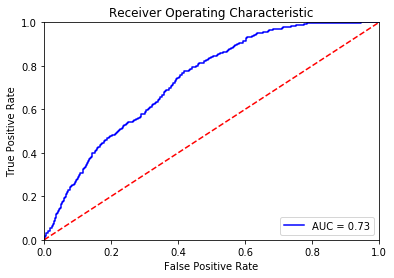

In [89]:
### Now I'll plot the ROC curve
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt

#Calculate the fpr and tpr for all thresholds of the classification
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_target, preds)
roc_auc = metrics.auc(fpr, tpr)

#Do the plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
##Now let's look at cross validation
#Using 10-fold cross validation
scores = cross_val_score(LogisticRegression(), training_features, training_target, scoring='accuracy', cv=10)
print(scores)
print("\n10-fold cross validation mean score",scores.mean())

[ 0.98397009  0.98397009  0.98397009  0.98397971  0.98397971  0.98397971
  0.98397971  0.98397971  0.98397971  0.98397971]

10-fold cross validation mean score 0.983976825954


In [93]:
#Now I want to look at the recall score to see how the model does on high value inquiries
#update: the recall score is even better than the model score. good stuff
print('Validation Results')
print(model.score(x_val, y_val))
print(recall_score(y_val, model.predict(x_val)))
print('\nTest Results')
print(model.score(test_features, test_target))
print(recall_score(test_target, model.predict(test_features)))

Validation Results
0.631699906083
0.699757028809

Test Results
0.632669668529
0.690553745928


In [121]:
#Now I'll develop a Random Forest classifier to see if it picks up any non linear relationships
#If it imporoves, I'll develop a xgboost algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2500, random_state=0, verbose=1)

rf.fit(x_train_res, y_train_res)

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 432.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2500, n_jobs=1, oob_score=False, random_state=0,
            verbose=1, warm_start=False)

In [129]:
phat = rf.predict_proba(test_features)[:,1]
#phat_train = rf.predict_proba(x_train_res)[:,1]

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   21.6s finished


In [123]:
print("Train ROC score: ", metrics.roc_auc_score(y_train_res, phat_train))
print("Test ROC score: ", metrics.roc_auc_score(test_target, phat))

Test ROC score:  0.709241696111


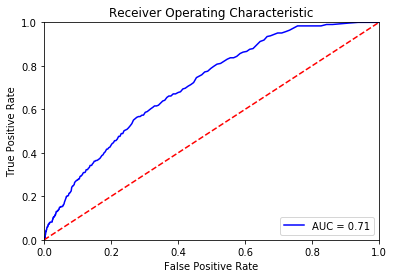

In [130]:
fpr, tpr, threshold = metrics.roc_curve(test_target, phat)
roc_auc = metrics.auc(fpr, tpr)

#Do the plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [192]:
##Feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [193]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train_res.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 90 (0.062835)
2. feature 95 (0.057536)
3. feature 96 (0.047894)
4. feature 42 (0.036430)
5. feature 41 (0.035168)
6. feature 12 (0.033052)
7. feature 97 (0.032285)
8. feature 45 (0.031216)
9. feature 46 (0.025125)
10. feature 98 (0.023356)
11. feature 92 (0.020290)
12. feature 26 (0.019313)
13. feature 80 (0.019027)
14. feature 24 (0.018876)
15. feature 18 (0.018770)
16. feature 2 (0.018747)
17. feature 78 (0.018648)
18. feature 93 (0.018219)
19. feature 27 (0.018110)
20. feature 44 (0.018009)
21. feature 28 (0.017611)
22. feature 1 (0.016982)
23. feature 106 (0.016863)
24. feature 0 (0.016756)
25. feature 19 (0.015810)
26. feature 25 (0.015799)
27. feature 20 (0.015707)
28. feature 21 (0.015333)
29. feature 47 (0.015042)
30. feature 17 (0.014623)
31. feature 50 (0.014064)
32. feature 29 (0.013739)
33. feature 91 (0.013384)
34. feature 9 (0.012770)
35. feature 30 (0.012680)
36. feature 22 (0.011644)
37. feature 14 (0.009757)
38. feature 3 (0.009754)
39. feat

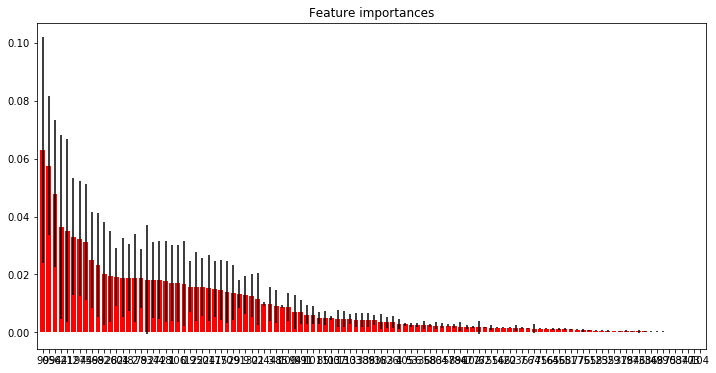

In [195]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_res.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_res.shape[1]), indices)
plt.xlim([-1, x_train_res.shape[1]])
plt.show()

In [164]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 15 and height to 12
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [9.0, 7.0]


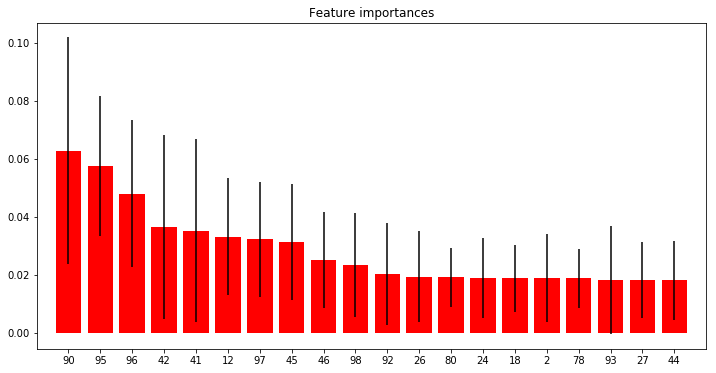

In [196]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importances[indices][0:20],
       color="r", yerr=std[indices][0:20], align="center")
plt.xticks(range(20), indices[0:20])
plt.xlim([-1, 20])
plt.show()

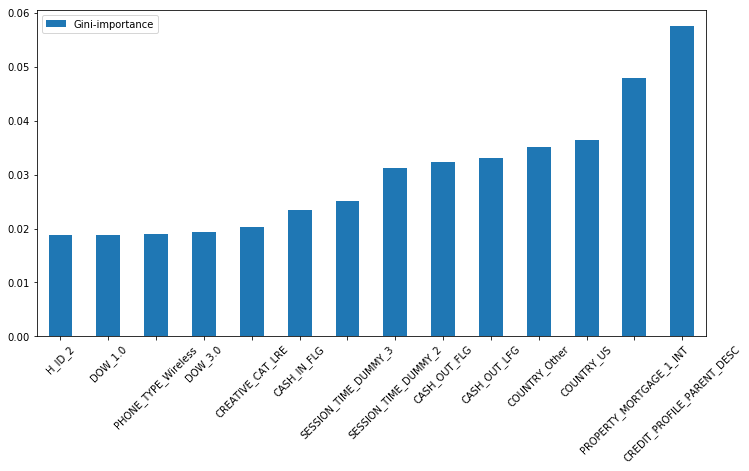

In [204]:
feats = {} 
for feature, importance in zip(df.columns, rf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance')
importances[-15:-1].plot(kind='bar', rot=45)

plt.show()